# Data Anlysis on Valorant Stats

Step One: Importing Modules

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data set from Ironic Ninja on Github: https://github.com/IronicNinja/valorant-stats

Step Two: Creating 3 dataframes from the seperate CSVs

Dataframe 1: Map Stats

In [96]:
# map data
tiers = []
count = 0
maps = pd.DataFrame()

for i in range(3, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/map_data/maps_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    count += 1

for dataframe in tiers:
     maps = pd.concat([maps,dataframe])

tiers.clear()

Dataframe 2: Agent Stats. Agents were seperated by maps in folders.

In [97]:
agents = pd.DataFrame()
tiers = []
map_names = ["all", "ascent", "bind", "breeze", "haven", "split"]
count = 0

for j in range(len(map_names)):
    for i in range(3, 21):
        tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/{map_names[j]}/agents_competitive_tier={i}.csv"))
        tiers[count]["tier"] = i
        tiers[count]["Map Name"] = map_names[j]
        count += 1

for dataframe in tiers:
    agents = pd.concat([agents, dataframe])

tiers.clear()

Dataframe 3: Weapon Stats. Weapons were seperated by maps in folders

In [98]:
weapons = pd.DataFrame()
tiers = []
map_names = ["all", "ascent", "bind", "breeze", "haven", "split"]
count = 0

for j in range(len(map_names)):
    for i in range(3, 21):
        tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/{map_names[j]}/agents_competitive_tier={i}.csv"))
        tiers[count]["tier"] = i
        tiers[count]["Map Name"] = map_names[j]
        count += 1

for dataframe in tiers:
    weapons = pd.concat([weapons, dataframe])

tiers.clear()

Step Three: EDA

In [99]:
maps.shape

(108, 7)

In [100]:
maps.head()

,Unnamed: 0,Map Name,Play Rate,Atk Win,Def Win,Num Matches,tier
0,0,Icebox,16.5%,51.6%,48.4%,"4,743",3
1,1,Haven,17.2%,51.2%,48.8%,"4,947",3
2,2,Breeze,15.9%,51.2%,48.8%,"4,590",3
3,3,Bind,18.4%,50.9%,49.1%,"5,304",3
4,4,Ascent,13.6%,48.2%,51.8%,"3,927",3


In [101]:
agents.shape

(1513, 13)

In [102]:
agents.head()

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.78,11.5,14.7,4.2,51.9%,18.8%,164,11.7%,"9,231",3,all
1,1,Raze,0.9,13.1,14.6,4.3,44.2%,11.7%,207,13.9%,"5,763",3,all
2,2,Jett,1.01,14.3,14.1,4.1,53.8%,10.8%,210,15.2%,"5,304",3,all
3,3,Reyna,1.01,14.7,14.6,3.9,48.5%,10.3%,224,14.7%,"5,049",3,all
4,4,Viper,0.8,11.0,13.9,4.3,49.3%,6.9%,165,11.8%,"3,417",3,all


In [103]:
weapons.shape

(1800, 9)

In [104]:
weapons.head()

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,6.4,12%,72.6%,15.3%,120,3,all
1,1,Phantom,5.3,11%,72.3%,16.6%,116,3,all
2,2,Spectre,4.5,10.1%,73.4%,16.6%,93,3,all
3,3,Ares,3.4,7.1%,68.6%,24.4%,95,3,all
4,4,Odin,3.0,8.3%,69.9%,21.8%,112,3,all


Clean Up

Looking for NaNs

In [105]:
maps.isna().sum()

Unnamed: 0     0
Map Name       0
Play Rate      0
Atk Win        0
Def Win        0
Num Matches    0
tier           0
dtype: int64

In [106]:
agents.isna().sum()

Unnamed: 0     0
Agent Name     0
KD             0
Kills          0
Deaths         0
Assists        0
Win Rate       0
Pick Rate      0
ACS            0
First Blood    0
Num Matches    0
tier           0
Map Name       0
dtype: int64

In [107]:
weapons.isna().sum()

Unnamed: 0          0
Weapon Name         0
Kills Per Match     0
Headshot            0
Bodyshot            0
Legshot             0
Damage Per Round    0
tier                0
Map Name            0
dtype: int64

Checking Types

In [108]:
maps.dtypes

Unnamed: 0      int64
Map Name       object
Play Rate      object
Atk Win        object
Def Win        object
Num Matches    object
tier            int64
dtype: object

In [109]:
agents.dtypes

Unnamed: 0     object
Agent Name     object
KD             object
Kills          object
Deaths         object
Assists        object
Win Rate       object
Pick Rate      object
ACS            object
First Blood    object
Num Matches    object
tier            int64
Map Name       object
dtype: object

In [110]:
weapons.dtypes

Unnamed: 0            int64
Weapon Name          object
Kills Per Match     float64
Headshot             object
Bodyshot             object
Legshot              object
Damage Per Round      int64
tier                  int64
Map Name             object
dtype: object

Replacing strings to allow conversion to numeric columns

In [111]:
columns_to_fix = ["Play Rate", "Atk Win", "Def Win"]
for i in columns_to_fix:
    maps[i] = maps[i].str.replace("%","")
maps["Num Matches"] = maps["Num Matches"].str.replace(",","")

In [112]:
columns_to_fix = ["Win Rate", "Pick Rate", "First Blood"]
for i in columns_to_fix:
    agents[i] = agents[i].str.replace("%","")
agents["Num Matches"] = agents["Num Matches"].str.replace(",","")

In [113]:
columns_to_fix = ["Headshot","Bodyshot","Legshot"]
for i in columns_to_fix:
    weapons[i] = weapons[i].str.replace("%","")

Converting to numeric columns

In [114]:
columns_to_convert = ["Play Rate", "Atk Win", "Def Win", "Num Matches"]
for i in columns_to_convert:
    maps[i] = pd.to_numeric(maps[i])

maps.dtypes

Unnamed: 0       int64
Map Name        object
Play Rate      float64
Atk Win        float64
Def Win        float64
Num Matches    float64
tier             int64
dtype: object

In [115]:
columns_to_convert = ["KD", "Kills", "Deaths", "Assists", "Win Rate", "Pick Rate", "ACS", "First Blood", "Num Matches"]
for i in columns_to_convert:
    agents[i] = pd.to_numeric(agents[i])

agents.dtypes

Unnamed: 0      object
Agent Name      object
KD             float64
Kills          float64
Deaths         float64
Assists        float64
Win Rate       float64
Pick Rate      float64
ACS              int64
First Blood    float64
Num Matches    float64
tier             int64
Map Name        object
dtype: object

In [116]:
columns_to_convert = ["Kills Per Match", "Headshot", "Bodyshot", "Legshot", "Damage Per Round"]
for i in columns_to_convert:
    weapons[i] = pd.to_numeric(weapons[i])

weapons.dtypes

Unnamed: 0            int64
Weapon Name          object
Kills Per Match     float64
Headshot            float64
Bodyshot            float64
Legshot             float64
Damage Per Round      int64
tier                  int64
Map Name             object
dtype: object

Dropping the Unnamed: 0 column

In [117]:
maps.drop("Unnamed: 0", axis=1, inplace=True)
agents.drop("Unnamed: 0", axis=1, inplace=True)
weapons.drop("Unnamed: 0", axis=1, inplace=True)

In [118]:
maps.head()

,Map Name,Play Rate,Atk Win,Def Win,Num Matches,tier
0,Icebox,16.5,51.6,48.4,4743.0,3
1,Haven,17.2,51.2,48.8,4947.0,3
2,Breeze,15.9,51.2,48.8,4590.0,3
3,Bind,18.4,50.9,49.1,5304.0,3
4,Ascent,13.6,48.2,51.8,3927.0,3


In [119]:
agents.head()

,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,Sage,0.78,11.5,14.7,4.2,51.9,18.8,164,11.7,9231.0,3,all
1,Raze,0.90,13.1,14.6,4.3,44.2,11.7,207,13.9,5763.0,3,all
2,Jett,1.01,14.3,14.1,4.1,53.8,10.8,210,15.2,5304.0,3,all
3,Reyna,1.01,14.7,14.6,3.9,48.5,10.3,224,14.7,5049.0,3,all
4,Viper,0.80,11.0,13.9,4.3,49.3,6.9,165,11.8,3417.0,3,all


In [120]:
weapons.head()

,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,Vandal,6.4,12.0,72.6,15.3,120,3,all
1,Phantom,5.3,11.0,72.3,16.6,116,3,all
2,Spectre,4.5,10.1,73.4,16.6,93,3,all
3,Ares,3.4,7.1,68.6,24.4,95,3,all
4,Odin,3.0,8.3,69.9,21.8,112,3,all


Step Four: Questions

Map Centered Questions

1. What is the average play rate for each map?

In [121]:
maps.groupby("Map Name")["Play Rate"].mean()

Map Name
Ascent    17.861111
Bind      17.494444
Breeze    13.477778
Haven     17.300000
Icebox    16.638889
Split     17.194444
Name: Play Rate, dtype: float64

2. What is the attack win rate vs defense win rate for each map?

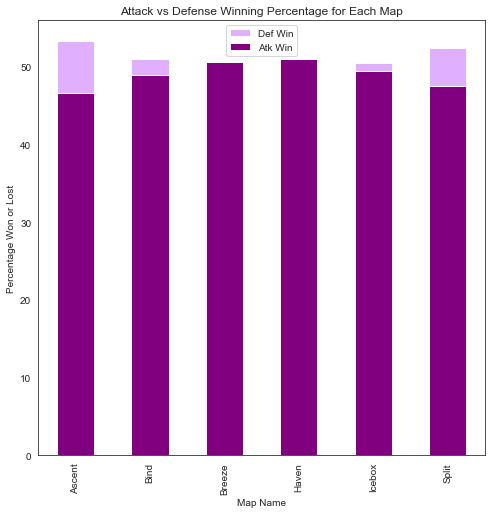

In [122]:
figure, axis = plt.subplots(figsize=(8, 8));
maps.groupby("Map Name")["Def Win"].mean().plot(kind='bar', color="#E0B0FF", stacked=True);
maps.groupby("Map Name")["Atk Win"].mean().plot(kind='bar', color='purple', stacked=True);
plt.ylabel("Percentage Won or Lost");
plt.title("Attack vs Defense Winning Percentage for Each Map");
plt.legend();

Weapon Centered Questions

3. Which weapon has the most kills per match on average?

In [123]:
weapons.groupby("Weapon Name")["Kills Per Match"].mean().sort_values(ascending=False)

Weapon Name
Vandal      10.212963
Phantom      6.346296
Spectre      3.256481
Operator     3.201869
Odin         2.523000
Ghost        2.210185
Ares         1.868571
Judge        1.668868
Sheriff      1.600926
Guardian     1.577143
Classic      1.501852
Bulldog      1.369444
Frenzy       1.266038
Marshal      1.135849
Stinger      0.903810
Bucky        0.790909
Shorty       0.699048
Name: Kills Per Match, dtype: float64

What about for each map?

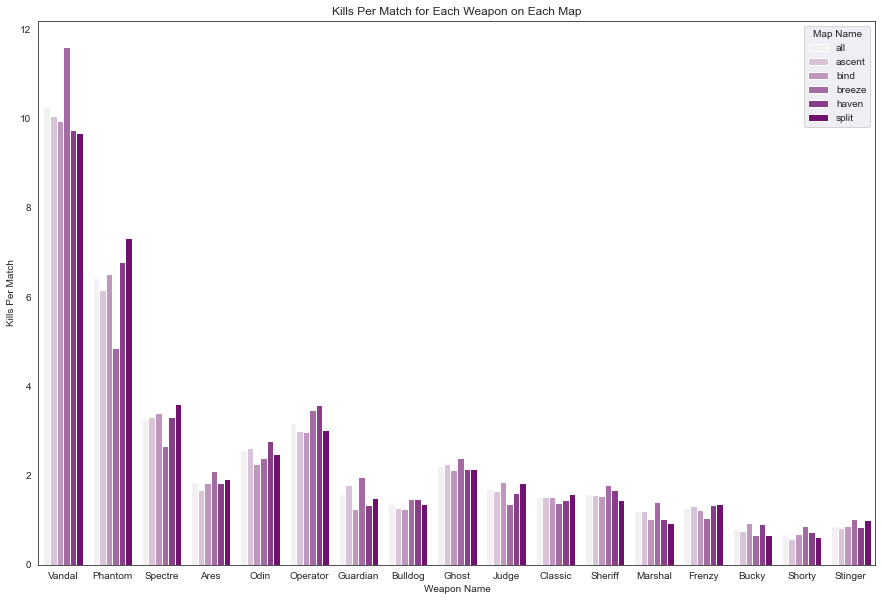

In [124]:
figure, axis = plt.subplots(figsize=(15, 10));
plt.title("Kills Per Match for Each Weapon on Each Map")
sns.set_style('dark')
sns.barplot(x="Weapon Name", y="Kills Per Match", hue="Map Name", data=weapons, ci=None, color='purple');

4. Is there a correlation between kills per match and headshots? 

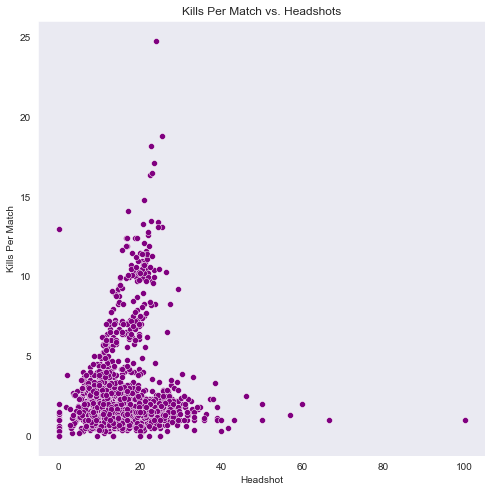

In [125]:
figure, axis = plt.subplots(figsize=(8, 8));
sns.set_style("white")
plt.title("Kills Per Match vs. Headshots")
sns.scatterplot(y="Kills Per Match", x="Headshot", data=weapons, color="purple");

What about kills per match and bodyshots?

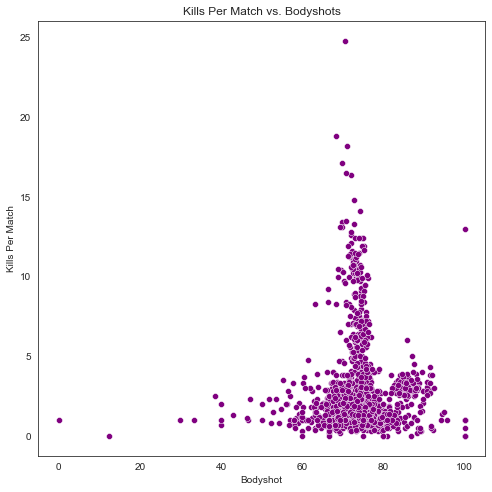

In [126]:
figure, axis = plt.subplots(figsize=(8, 8));
sns.set_style("white")
plt.title("Kills Per Match vs. Bodyshots")
sns.scatterplot(y="Kills Per Match", x="Bodyshot", data=weapons, color="purple");

What about kills per match and legshots?

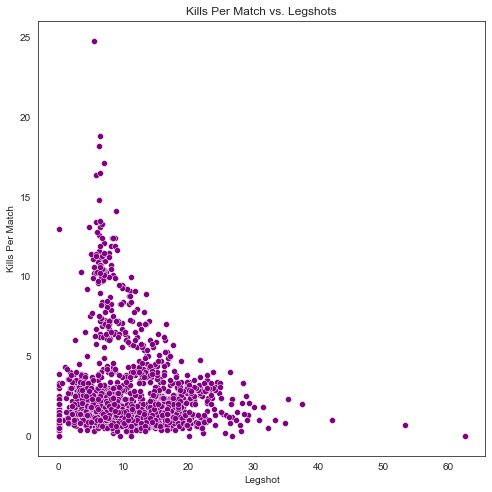

In [127]:
figure, axis = plt.subplots(figsize=(8, 8));
sns.set_style("white")
plt.title("Kills Per Match vs. Legshots")
sns.scatterplot(y="Kills Per Match", x="Legshot", data=weapons, color="purple");

Agent Centered Questions

5. Which character performs the best on each map (using ACS, Average Combat Score, as the measurement)?

In [128]:
agents.sort_values("ACS").groupby("Map Name").tail(1).sort_values("Map Name")

,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
1,Reyna,1.38,18.0,13.0,3.7,45.5,17.5,292,16.2,NaN,20,all
5,Raze,2.30,23.0,10.0,5.0,100.0,6.3,350,21.7,NaN,20,ascent
14,Astra,1.46,25.3,17.3,7.3,33.3,0.6,299,11.8,153.0,5,bind
14,Breach,1.50,24.0,16.0,7.0,50.0,0.3,281,14.6,102.0,10,breeze
14,Yoru,1.95,19.5,10.0,2.5,50.0,1.0,309,7.7,102.0,18,haven
12,Astra,1.67,25.0,15.0,3.0,100.0,0.9,290,12.0,51.0,16,split


this measurement takes the highest ACS

What about average ACS?

6. What is the average ACS for each character?

In [129]:
agents.groupby("Agent Name")["ACS"].mean().sort_values(ascending=False)

Agent Name
Reyna        245.452830
Jett         236.857143
Raze         231.882353
Phoenix      226.857143
Yoru         210.440860
Viper        198.485437
Killjoy      198.213592
Omen         197.514851
Sova         197.303922
Brimstone    197.071429
Astra        194.326316
Skye         193.147059
Breach       192.876289
Cypher       189.815534
Sage         188.571429
Name: ACS, dtype: float64

Do these stats change based on the tier?

7. Which character performs the best on each map (using ACS, Average Combat Score, as the measurement) for each tier?

In [130]:
agents.sort_values("ACS").groupby("tier").tail(1).sort_values("tier")

,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
2,Reyna,1.25,18.6,14.8,4.3,41.7,9.6,274,14.3,612.0,3,ascent
6,Jett,1.49,18.7,12.6,3.7,55.6,8.0,267,12.5,NaN,4,haven
14,Astra,1.46,25.3,17.3,7.3,33.3,0.6,299,11.8,153.0,5,bind
9,Phoenix,1.20,18.1,15.1,4.2,41.2,5.3,262,15.9,867.0,6,split
1,Reyna,1.15,17.7,15.4,4.7,57.4,13.0,256,16.9,5151.0,7,haven
13,Yoru,1.57,20.7,13.2,4.8,50.0,1.3,319,14.5,510.0,8,ascent
0,Reyna,1.19,17.8,15.0,4.3,51.8,15.6,256,15.6,9945.0,9,haven
14,Breach,1.50,24.0,16.0,7.0,50.0,0.3,281,14.6,102.0,10,breeze
0,Reyna,1.24,18.4,14.8,3.8,53.8,18.2,266,17.4,4743.0,11,haven
6,Raze,1.27,19.3,15.3,5.2,66.7,6.1,274,16.7,918.0,12,haven


8. What is the average ACS for each character for each tier?

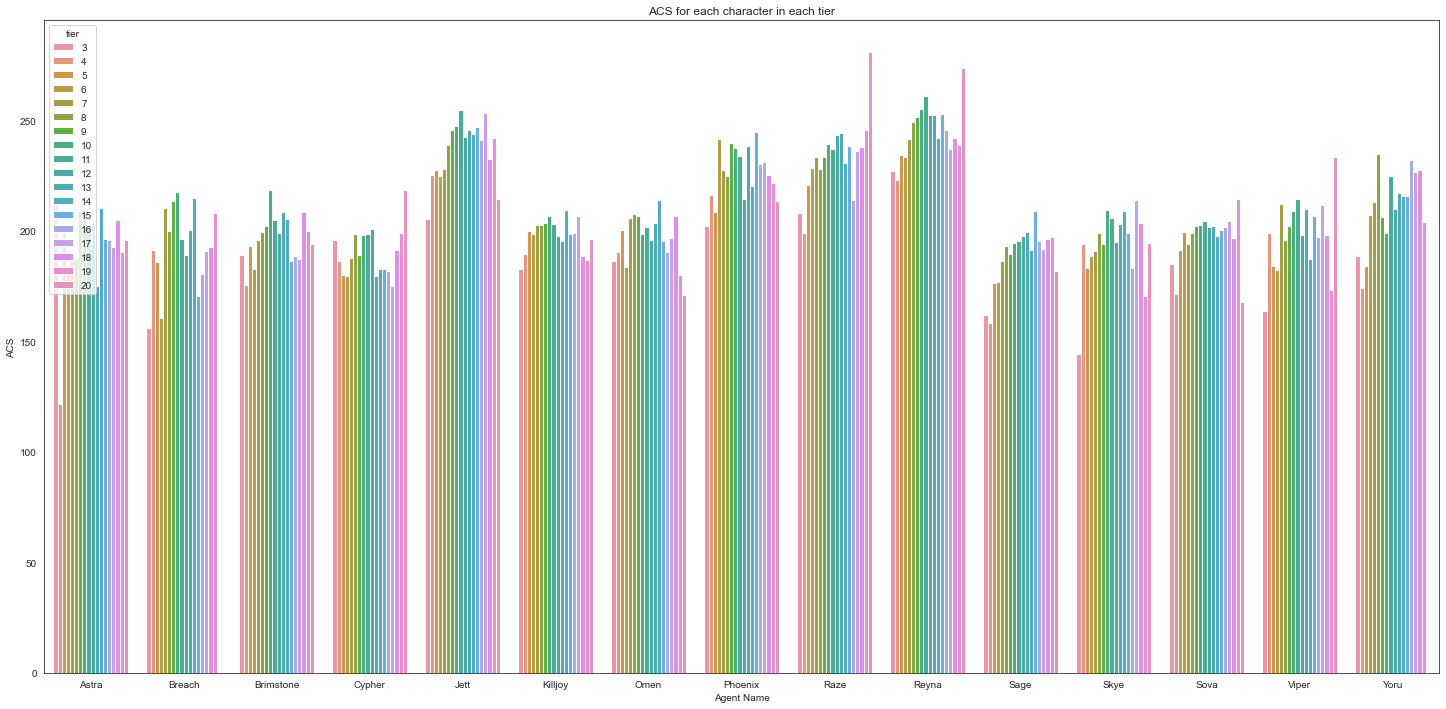

In [131]:
figure, axis = plt.subplots(figsize=(25, 12));
sns.barplot(x=agents.groupby(['tier','Agent Name'])["Agent Name"].first() , y=agents.groupby(['tier','Agent Name'])["ACS"].mean(), hue=agents.groupby(['tier','Agent Name'])["tier"].first() );
plt.title("ACS for each character in each tier");

9. Which character has the highest average win rate?

In [132]:
agents.groupby(['Agent Name'])["Win Rate"].mean().sort_values(ascending=False)

Agent Name
Raze         52.141176
Viper        51.989320
Killjoy      51.833010
Jett         51.745714
Sage         51.586667
Skye         50.891176
Omen         50.684158
Brimstone    49.765306
Phoenix      49.332653
Reyna        49.066038
Breach       48.812371
Sova         47.022549
Astra        46.889474
Cypher       44.902913
Yoru         41.998925
Name: Win Rate, dtype: float64

10. Who is the most commonly picked character?

In [133]:
agents.groupby(['Agent Name'])["Pick Rate"].mean().sort_values(ascending=False)

Agent Name
Reyna        14.820755
Jett         14.493333
Sage         14.421905
Omen          8.129703
Raze          8.094118
Sova          7.722549
Killjoy       6.761165
Viper         5.627184
Cypher        4.781553
Phoenix       4.705102
Brimstone     4.118367
Skye          3.738235
Yoru          2.319355
Breach        1.946392
Astra         1.469474
Name: Pick Rate, dtype: float64

11. Map can change agent effectiveness, so what are the agent's average win rate for each map?

In [134]:
agents.groupby(["Map Name", "Agent Name"])["Win Rate"].mean()

Map Name  Agent Name
all       Astra         45.361111
          Breach        49.570588
          Brimstone     51.855556
          Cypher        47.072222
          Jett          50.605556
                          ...    
split     Sage          55.031250
          Skye          55.718750
          Sova          30.478571
          Viper         53.037500
          Yoru          44.361538
Name: Win Rate, Length: 90, dtype: float64

In [135]:
agents.groupby(["Map Name", "Agent Name"])["Win Rate"].mean().sort_values(ascending=False)

Map Name  Agent Name
bind      Breach        62.281250
          Viper         58.188889
          Killjoy       56.323529
split     Astra         56.264286
ascent    Omen          55.923529
                          ...    
haven     Yoru          40.160000
bind      Astra         38.468750
breeze    Cypher        38.183333
ascent    Yoru          35.806250
split     Sova          30.478571
Name: Win Rate, Length: 90, dtype: float64

12. What is the average kill death ratio for each character?

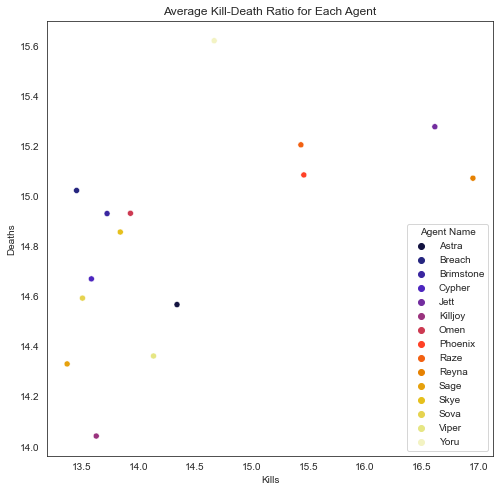

In [136]:
figure, axis = plt.subplots(figsize=(8, 8));
plt.title("Average Kill-Death Ratio for Each Agent")
sns.set_style('white')
sns.scatterplot(x=agents.groupby("Agent Name")["Kills"].mean(), y=agents.groupby("Agent Name")["Deaths"].mean(), hue=agents.groupby("Agent Name")["Agent Name"].first(), palette='CMRmap');

13.  Does each agent fit their "role" on average?

Duelists: first to enter sites and engage enemies. Should have high kills, deaths, first bloods, and low assists

In [137]:
duelists = ["Phoenix", "Jett", "Reyna", "Raze", "Yoru", "Neon"]
agents[agents["Agent Name"].isin(duelists) ].groupby("Agent Name").agg({
    "Kills" : "mean",
    "Deaths" : "mean",
    "Assists" : "mean",
    "First Blood" : "mean"
})

,Kills,Deaths,Assists,First Blood
Agent Name,,,,
Jett,16.614286,15.277143,3.846667,18.657143
Phoenix,15.459184,15.084694,4.204082,16.958163
Raze,15.433333,15.204902,4.887255,15.409804
Reyna,16.950000,15.071698,4.150000,16.242453
Yoru,14.668817,15.620430,3.726882,15.903226


Controllers: Manipulate map to set up their team. Should have high assists, low deaths, low first bloods, and average kills

In [138]:
controllers = ["Astra", "Brimstone", "Omen", "Viper"]
agents[agents["Agent Name"].isin(controllers) ].groupby("Agent Name").agg({
    "Kills" : "mean",
    "Deaths" : "mean",
    "Assists" : "mean",
    "First Blood" : "mean"
})

,Kills,Deaths,Assists,First Blood
Agent Name,,,,
Astra,14.341053,14.567368,4.823158,9.502105
Brimstone,13.724490,14.930612,6.565306,11.665306
Omen,13.930693,14.931683,5.098020,12.263366
Viper,14.133981,14.362136,5.316505,11.591262


Initiators: Challenge angles and set duelists up for pushing. Should have high assists, low first bloods, high kills, and average deaths.

In [139]:
initiators = ["Breach", "Skye", "Sova", "Fade"]
agents[agents["Agent Name"].isin(initiators) ].groupby("Agent Name").agg({
    "Kills" : "mean",
    "Deaths" : "mean",
    "Assists" : "mean",
    "First Blood" : "mean"
})

,Kills,Deaths,Assists,First Blood
Agent Name,,,,
Breach,13.455670,15.022680,5.459794,13.838144
Skye,13.841176,14.856863,3.991176,12.512745
Sova,13.507843,14.593137,5.750000,10.271569


Sentinels: Defensive experts. Should have low everything

In [140]:
sentinels = ["Chamber", "Cypher", "Killjoy", "Sage"]
agents[agents["Agent Name"].isin(sentinels) ].groupby("Agent Name").agg({
    "Kills" : "mean",
    "Deaths" : "mean",
    "Assists" : "mean",
    "First Blood" : "mean"
})

,Kills,Deaths,Assists,First Blood
Agent Name,,,,
Cypher,13.586408,14.669903,4.135922,10.277670
Killjoy,13.629126,14.042718,4.057282,9.867961
Sage,13.372381,14.330476,4.465714,11.189524


In general, yes agents follow roles on average.